In [1]:
from casatasks import clearcal, ft, bandpass, applycal, flagdata, tclean, flagmanager, uvsub, gaincal, split, imstat, \
    gencal
from casatools import table, measures, componentlist, msmetadata
import math
import sys, os, time
import numpy as np
import logging, glob
from astropy.time import Time

from ovrolwasolar import utils,flagging
from ovrolwasolar.file_handler import File_Handler
from ovrolwasolar.primary_beam import analytic_beam as beam 
from ovrolwasolar import primary_beam
from ovrolwasolar.generate_calibrator_model import model_generation
from ovrolwasolar import generate_calibrator_model
import timeit
tb = table()
me = measures()
cl = componentlist()
msmd = msmetadata()

In [2]:
bcaltables = sorted(glob.glob('/nas6/ovro-lwa-data/calibrations/caltables_beam/20240311_100401*.bcal'))

In [3]:
bmcalfac=[]

for bcaltb_bm in bcaltables:
    tb.open(bcaltb_bm, nomodify=True)
    amps = tb.getcol('CPARAM')
    flags = tb.getcol('FLAG')
    amps_masked = np.ma.array(amps, mask=flags)
    #amps_med = np.abs(np.ma.median(amps_masked, axis=(0,2))).data
    npol, nch, nant = flags.shape
    num_ant_per_chan = nant - np.sum(flags, axis=2)

    bmcalfac_per_chan = num_ant_per_chan ** 2.
    bmcalfac.append(bmcalfac_per_chan)
    tb.close()

bmcalfac = np.concatenate(bmcalfac, axis=1)

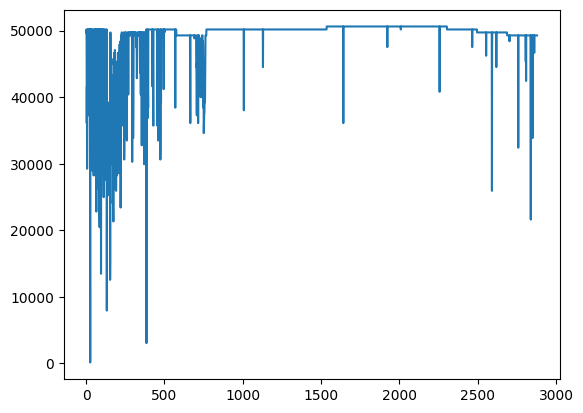

In [4]:
from matplotlib import pyplot as plt
plt.plot(bmcalfac[0])

In [5]:
bmcalfac[0].shape

(2880,)